In [1]:
import mne
import os
from os.path import abspath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne.time_frequency import psd_welch
from tqdm import tqdm
import itertools
import warnings
# import pywt
from matplotlib import cm
from multiprocessing import Manager
warnings.filterwarnings("ignore")
from multiprocessing import Process
file_path="/media/kashraf/Elements/data_gen_may_2021/EEG data/Visual/"
filename=os.listdir(file_path)
path_montage="/media/kashraf/Elements/data_gen_may_2021/montage/"
montage=mne.channels.read_montage(path_montage+"//"+"neuroscan64ch.loc")
raw_data=[]
for file in tqdm(filename):
    files=mne.io.read_raw_cnt(file_path+"/"+file,montage=montage, preload=True,verbose=False);
    raw_data.append(files)

## Selecting channels to include
good_ch= mne.pick_channels(raw_data[0].info['ch_names'], include=[],
                        exclude=["EKG","EMG",'VEO','HEO','Trigger'])
mne.pick_info(raw_data[0].info,sel=good_ch,copy=False,verbose=False)

for f in tqdm(raw_data):
    mne.pick_info(f.info,sel=good_ch,copy=False)
    f.set_montage(montage)

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 584.39it/s]


In [2]:
events= mne.events_from_annotations(raw_data[6])

# event_id_recall={'12': 1, '14': 2, '16': 3, '18': 4}
# event_id_encoding={"22":1,"24":2,"26":3,"28":4}
# # event_id_answer={""}
# event_id_answer={"51":9,"52":10}
events
info = raw_data[1].info

Used Annotations descriptions: ['12', '14', '16', '18', '2', '255', '4', '51', '52', '6', '8']


In [3]:
import multiprocessing
from tqdm import tqdm
data=dict()
for i in range(len(raw_data)):
    data[i+1]={
    2:mne.Epochs(raw_data[i], events[0], event_id=1).get_data(),
    4:mne.Epochs(raw_data[i], events[0], event_id=2).get_data(),
    6:mne.Epochs(raw_data[i], events[0], event_id=4).get_data(),
    8:mne.Epochs(raw_data[i], events[0], event_id=5).get_data(),
    }

60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
0 bad epochs dropped
60 matchin

0 projection items activated
Loading data for 60 events and 176 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
1 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
1 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 176 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projecti

### Subject level PSD analysis

In [4]:
# for sub in data:
#     for trial in data[sub][2]:
#         psd,freq= mne.time_frequency.psd_welch(erp_data,n_fft=176,verbose=0)
#         psd= np.average(psd,axis=2).flatten()
        

In [78]:
psds2 = [data[sub][2] for sub in data]
psds4 = [data[sub][4] for sub in data]
psds6 = [data[sub][6] for sub in data]
psds8 = [data[sub][8] for sub in data]

def psd_compute(sub,cl):
    sample = mne.EpochsArray(data[sub][cl],info=info)
    psd,freq= mne.time_frequency.psd_welch(sample,n_fft=176,verbose=0)
    psd = np.mean(psd,axis= (1,2))
    psd_normalized = (psd-np.min(psd))/(np.max(psd)-np.min(psd))
#     psd_normalized = (psd-np.mean(psd))/np.std(psd)

    return psd_normalized
psds2 = [psd_compute(sub,2) for sub in data]
psds4 = [psd_compute(sub,4) for sub in data]
psds6 = [psd_compute(sub,6) for sub in data]
psds8 = [psd_compute(sub,8) for sub in data]

60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad

## 1. Visualizing Mean PSD distribution for each subject across all (60) experiment trials
### CL-2

Text(0.05, 0.5, 'Mean PSD')

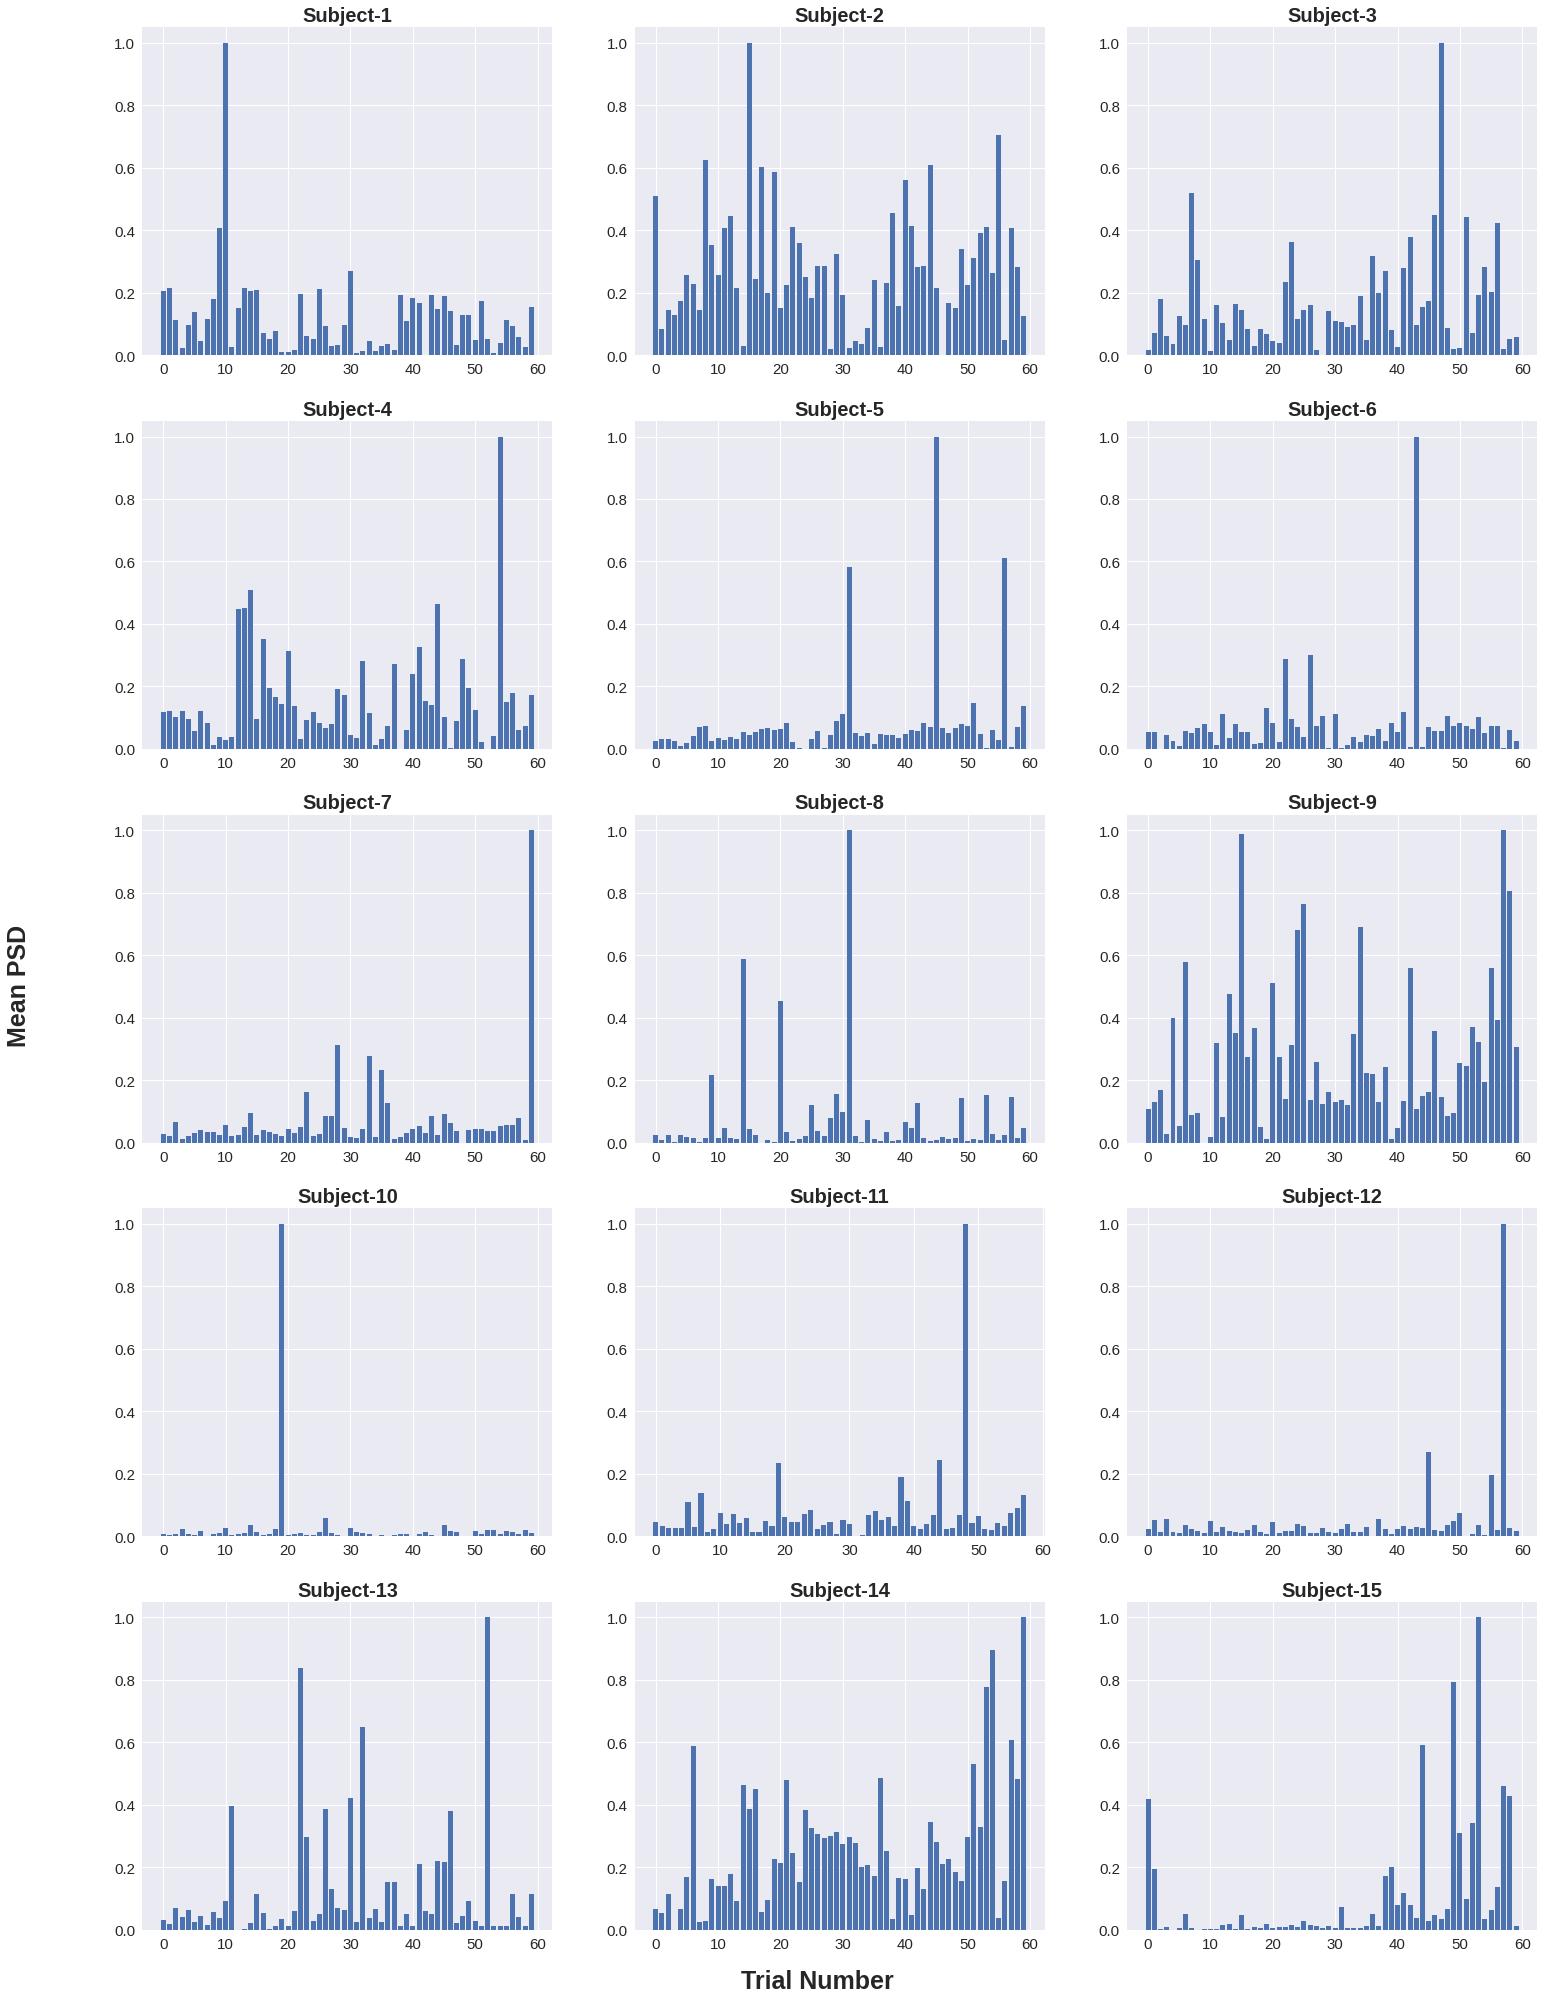

In [86]:
plt.style.use("seaborn")
font = {'weight' : 'bold',
        'size'   : 25}

titles = ["Subject-"+str(i) for i in range(1,16)]
x = [np.arange(data[sub][2].shape[0]) for sub in data]

fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(25,35))
for ax,psd, x,title in zip(axes.flatten(),psds2,x,titles):
    ax.bar(x,psd)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title(title,fontsize=20,weight="bold")
fig.text(0.5, 0.102, 'Trial Number', ha='center',fontdict=font)
fig.text(0.05, 0.5, 'Normalized Mean PSD', va='center', rotation='vertical',fontdict=font)

### CL-4

Text(0.05, 0.5, 'Mean PSD')

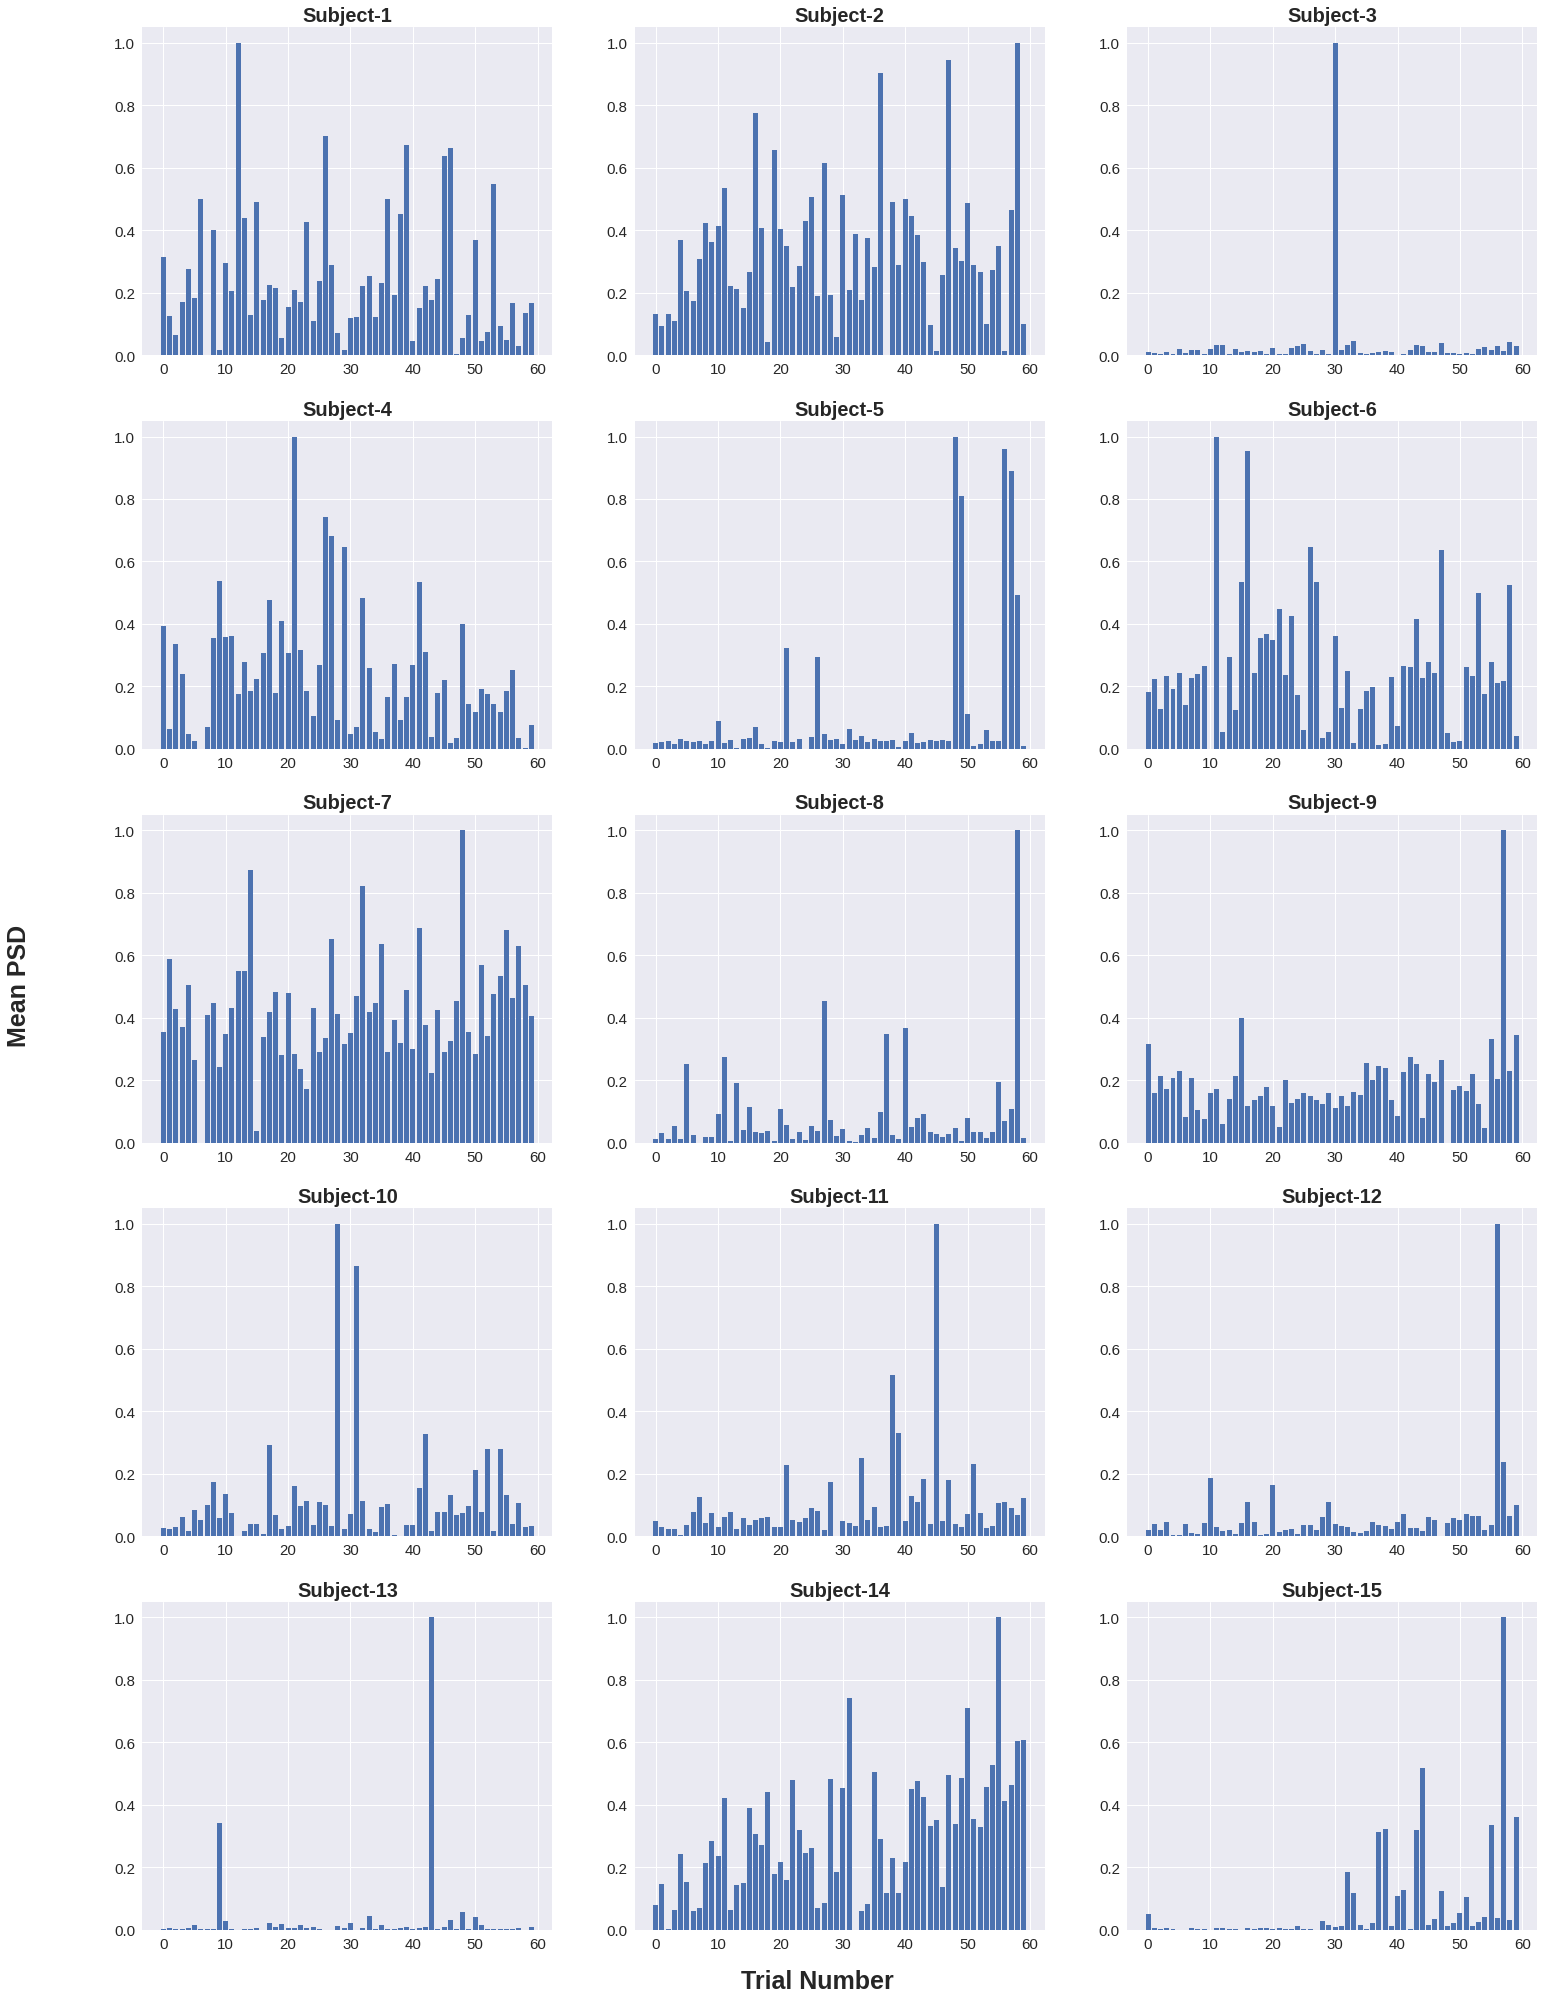

In [88]:
plt.style.use("seaborn")
font = {'weight' : 'bold',
        'size'   : 25}

titles = ["Subject-"+str(i) for i in range(1,16)]
x = [np.arange(data[sub][4].shape[0]) for sub in data]
fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(25,35))
for ax,psd, x,title in zip(axes.flatten(),psds4,x,titles):
    ax.bar(x,psd)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title(title,fontsize=20,weight="bold")
fig.text(0.5, 0.102, 'Trial Number', ha='center',fontdict=font)
fig.text(0.05, 0.5, 'Normalized Mean PSD', va='center', rotation='vertical',fontdict=font)

### CL-6

Text(0.05, 0.5, 'Normalized Mean PSD')

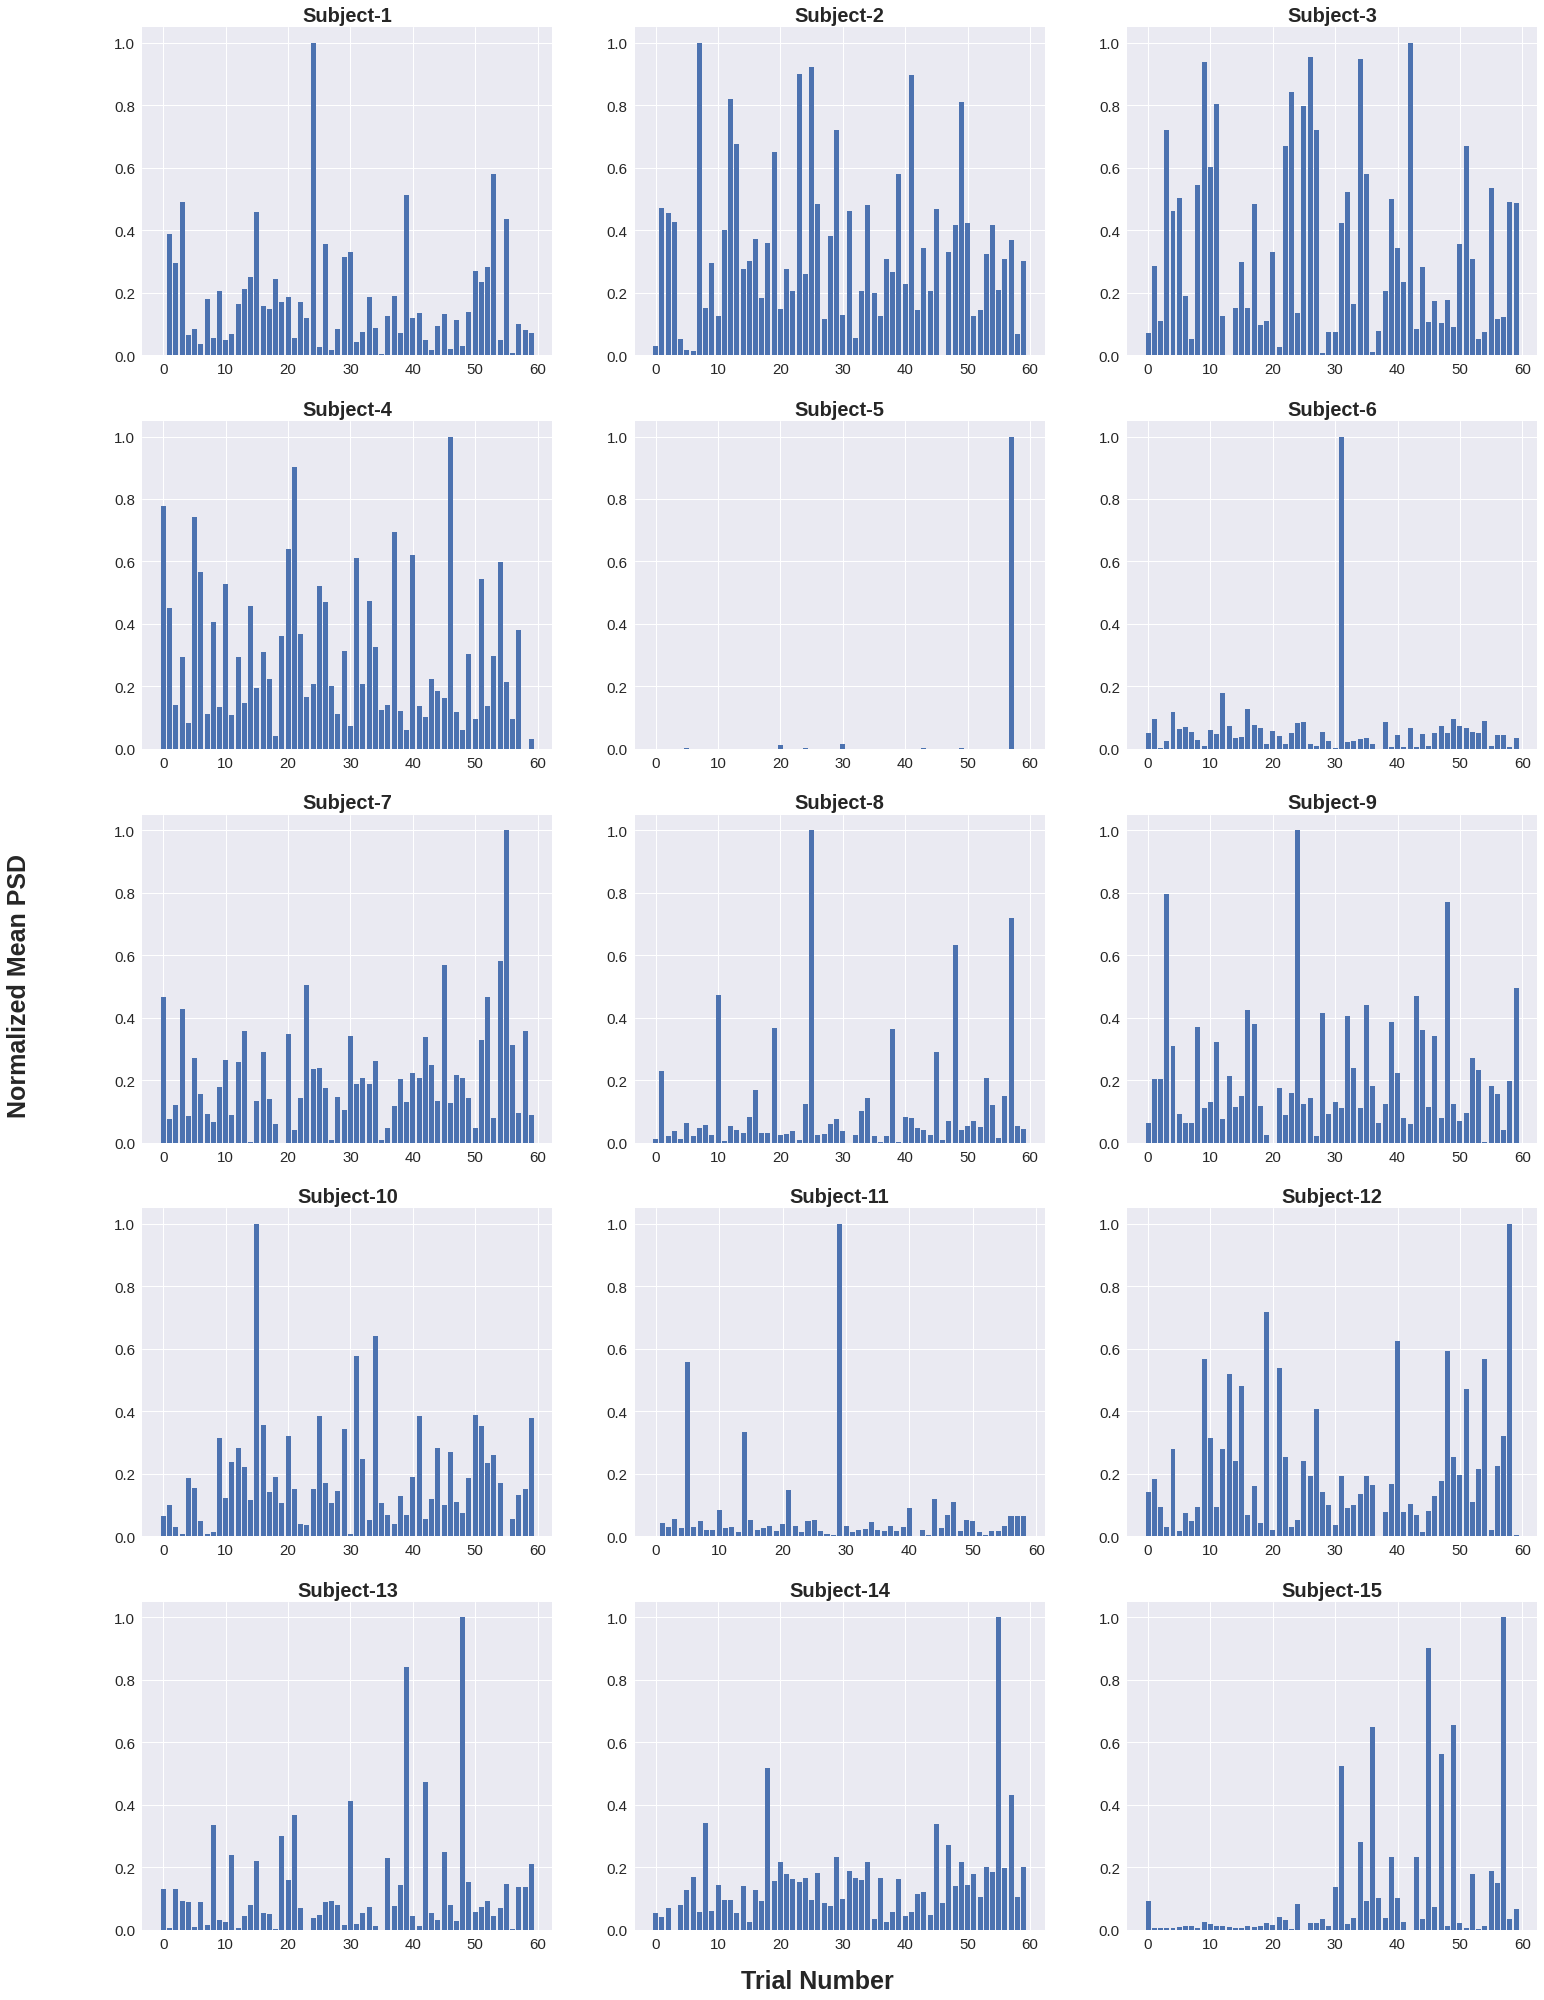

In [89]:
plt.style.use("seaborn")
font = {'weight' : 'bold',
        'size'   : 25}

titles = ["Subject-"+str(i) for i in range(1,16)]
x = [np.arange(data[sub][6].shape[0]) for sub in data]
fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(25,35))
for ax,psd, x,title in zip(axes.flatten(),psds6,x,titles):
    ax.bar(x,psd)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title(title,fontsize=20,weight="bold")
fig.text(0.5, 0.102, 'Trial Number', ha='center',fontdict=font)
fig.text(0.05, 0.5, 'Normalized Mean PSD', va='center', rotation='vertical',fontdict=font)

### CL-8

Text(0.05, 0.5, 'Normalized Mean PSD')

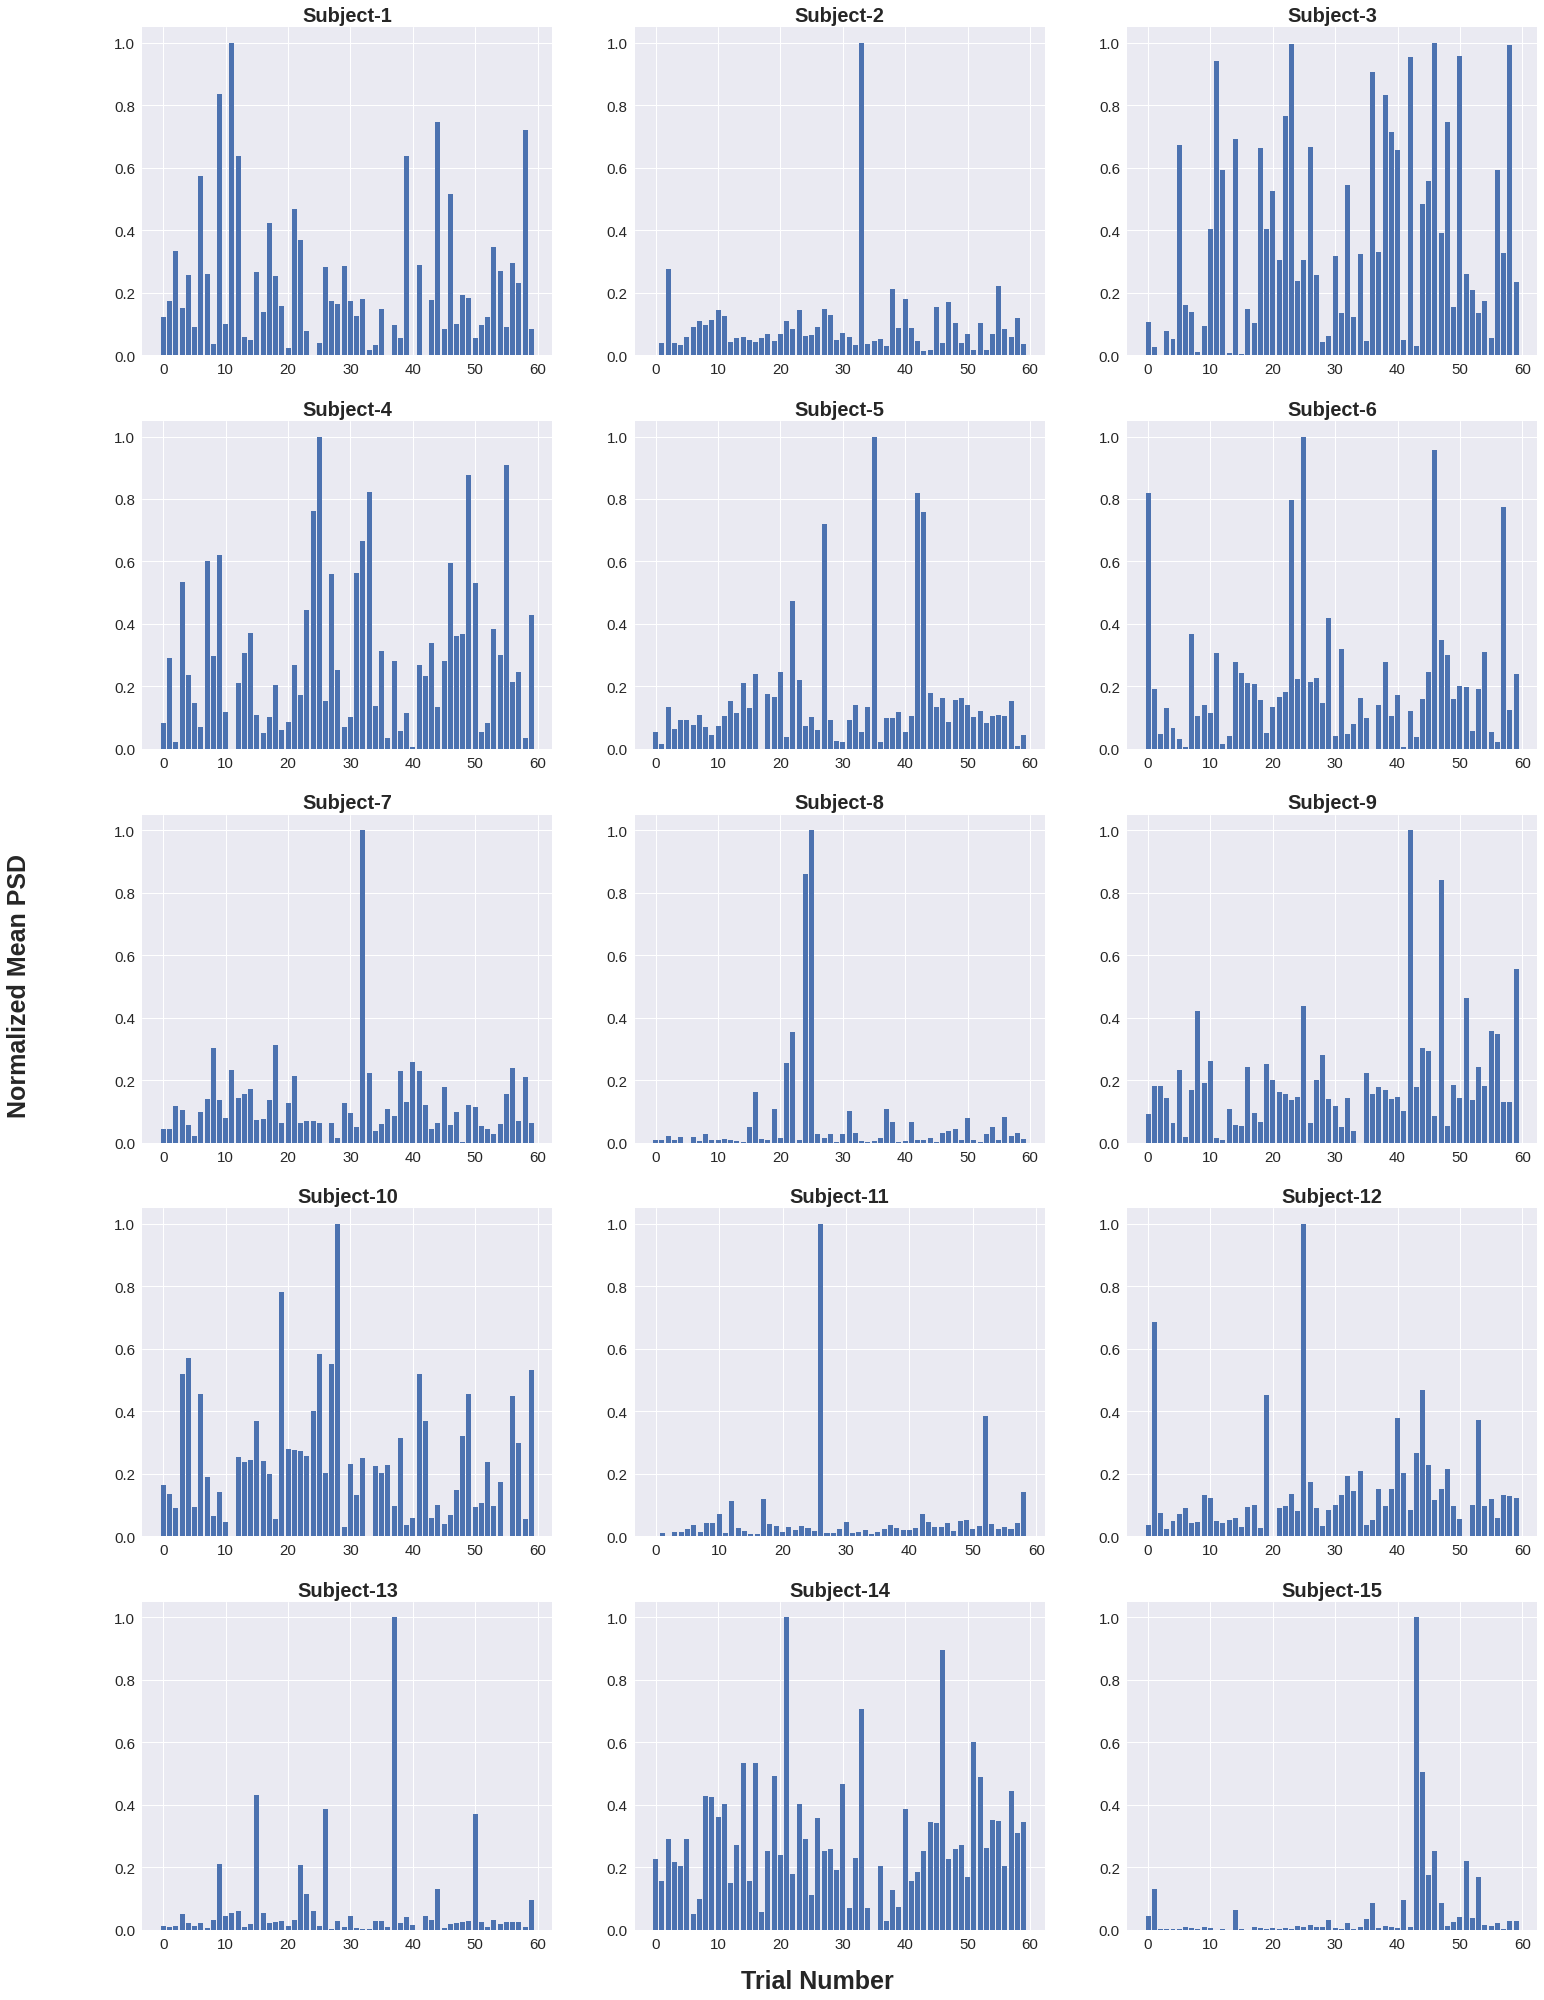

In [91]:
plt.style.use("seaborn")
font = {'weight' : 'bold',
        'size'   : 25}

titles = ["Subject-"+str(i) for i in range(1,16)]
x = [np.arange(data[sub][8].shape[0]) for sub in data]
fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(25,35))
for ax,psd, x,title in zip(axes.flatten(),psds8,x,titles):
    ax.bar(x,psd)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_title(title,fontsize=20,weight="bold")
fig.text(0.5, 0.102, 'Trial Number', ha='center',fontdict=font)
fig.text(0.05, 0.5, 'Normalized Mean PSD', va='center', rotation='vertical',fontdict=font)